In [1]:
using Distributions
using PGFPlots
using Colors, ColorSchemes

In [48]:
resetPGFPlotsPreamble()

1-element Vector{Any}:
 "\\usepackage{pgfplots}\n\\pgfplots" ⋯ 105 bytes ⋯ "{arrows}\n\\tikzset{>=stealth'}\n"

In [49]:
include("/home/smkatz/Documents/Util/support_code.jl");

In [58]:
function get_xs(ndists, space_between; step=0.05)
    curr_start = 0.0
    curr_end = 1.0
    xs = []

    for i = 1:ndists
        push!(xs, collect(range(curr_start, curr_end, step=step)))
        curr_start += 1 + space_between
        curr_end += 1 + space_between
    end
    return xs
end

get_xs (generic function with 1 method)

In [21]:
function get_ys_interp(xs, α₀, β₀, α₁, β₁)
    ndists = length(xs)
    points = collect(range(0.0, 1.0, ndists))
    ys = []

    for i = 1:ndists
        w = 1.0 - points[i]
        α = w * α₀ + (1 - w) * α₁
        β = w * β₀ + (1 - w) * β₁
        push!(ys, pdf.(Beta(α, β), xs[1]))
    end

    return ys
end

get_ys_interp (generic function with 1 method)

In [63]:
sqe_kernel(r; ℓ=0.3) = exp(-r^2 / (2 * ℓ^2))

sqe_kernel (generic function with 1 method)

In [70]:
function get_ys_kernel(xs, α₀, β₀, α₁, β₁; ℓ=0.3)
    ndists = length(xs)
    points = collect(range(0.0, 1.0, ndists))
    ys = []

    for i = 1:ndists
        r1 = points[i]
        r2 = points[i] - 1.0

        k1 = sqe_kernel(r1, ℓ=ℓ)
        k2 = sqe_kernel(r2, ℓ=ℓ)

        α = 1 + k1 * (α₀ - 1) + k2 * (α₁ - 1)
        β = 1 + k1 * (β₀ - 1) + k2 * (β₁ - 1)
        push!(ys, pdf.(Beta(α, β), xs[1]))
    end

    return ys
end

get_ys_kernel (generic function with 2 methods)

In [24]:
pastel_blue = RGB(27 / 255, 161 / 255, 234 / 255)
pastel_purple = RGB(135 / 255, 112 / 255, 254 / 255)
pastel_red = RGB(245 / 255, 97 / 255, 92 / 255);

In [30]:
cmap = ColorMaps.RGBArrayMap([pastel_blue, pastel_purple, pastel_red], interpolation_levels=7);

In [40]:
cs1 = ColorScheme(range(pastel_blue, pastel_purple, length=4))

In [44]:
display(MIME("text/plain"), cs1)

ColorScheme{Vector{RGB{Float64}}, String, String}(RGB{Float64}[RGB{Float64}(0.10588235294117647,0.6313725490196078,0.9176470588235294), RGB{Float64}(0.24705882352941178,0.5673202614379085,0.9437908496732026), RGB{Float64}(0.3882352941176471,0.5032679738562091,0.9699346405228758), RGB{Float64}(0.5294117647058824,0.4392156862745098,0.996078431372549)], "", "")

In [41]:
cs2 = ColorScheme(range(pastel_purple, pastel_red, length=4))

In [45]:
display(MIME("text/plain"), cs2)

ColorScheme{Vector{RGB{Float64}}, String, String}(RGB{Float64}[RGB{Float64}(0.5294117647058824,0.4392156862745098,0.996078431372549), RGB{Float64}(0.673202614379085,0.41960784313725485,0.7843137254901961), RGB{Float64}(0.8169934640522877,0.4,0.5725490196078431), RGB{Float64}(0.9607843137254902,0.3803921568627451,0.3607843137254902)], "", "")

In [50]:
pushPGFPlotsPreamble("\\definecolor{cmap1}{rgb}{0.10588235294117647,0.6313725490196078,0.9176470588235294}")
pushPGFPlotsPreamble("\\definecolor{cmap2}{rgb}{0.24705882352941178,0.5673202614379085,0.9437908496732026}")
pushPGFPlotsPreamble("\\definecolor{cmap3}{rgb}{0.3882352941176471,0.5032679738562091,0.9699346405228758}")
pushPGFPlotsPreamble("\\definecolor{cmap4}{rgb}{0.5294117647058824,0.4392156862745098,0.996078431372549}")
pushPGFPlotsPreamble("\\definecolor{cmap5}{rgb}{0.673202614379085,0.41960784313725485,0.7843137254901961}")
pushPGFPlotsPreamble("\\definecolor{cmap6}{rgb}{0.8169934640522877,0.4,0.5725490196078431}")
pushPGFPlotsPreamble("\\definecolor{cmap7}{rgb}{0.9607843137254902,0.3803921568627451,0.3607843137254902}");

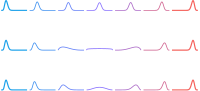

In [78]:
ndists = 7
space_between = 0.1
step = 0.01

xs = get_xs(ndists, space_between, step=step)
ys = get_ys_interp(xs, 10, 40, 40, 10)

ax1 = Axis(style="hide axis")
for (i, (x, y)) in enumerate(zip(xs, ys))
    if i == 1 || i == ndists
        push!(ax1, Plots.Linear(x, y, mark="none", style="very thick, solid, cmap$(i)"))
    else
        push!(ax1, Plots.Linear(x, y, mark="none", style="thick, solid, cmap$(i)"))
    end
end
ax1.height = "2cm"
ax1.width = "10cm"

ys_kernel = get_ys_kernel(xs, 10, 40, 40, 10, ℓ=0.15)
ax2 = Axis(style="hide axis")
for (i, (x, y)) in enumerate(zip(xs, ys_kernel))
    if i == 1 || i == ndists
        push!(ax2, Plots.Linear(x, y, mark="none", style="very thick, solid, cmap$(i)"))
    else
        push!(ax2, Plots.Linear(x, y, mark="none", style="thick, solid, cmap$(i)"))
    end
end
ax2.height = "2cm"
ax2.width = "10cm"

ys_kernel = get_ys_kernel(xs, 10, 40, 40, 10, ℓ=0.2)
ax3 = Axis(style="hide axis")
for (i, (x, y)) in enumerate(zip(xs, ys_kernel))
    if i == 1 || i == ndists
        push!(ax3, Plots.Linear(x, y, mark="none", style="very thick, solid, cmap$(i)"))
    else
        push!(ax3, Plots.Linear(x, y, mark="none", style="thick, solid, cmap$(i)"))
    end
end
ax3.height = "2cm"
ax3.width = "10cm"

g = GroupPlot(1, 3, groupStyle="horizontal sep = 3.5cm, vertical sep = 1cm")
push!(g, ax1)
push!(g, ax2)
push!(g, ax3)
PGFPlots.save("kernel_demo.tex", g, include_preamble=false)
g

In [79]:
maximum(xs[end])

7.6